***

# Table of contents

- [Comparison of $N_\ell$ prescriptions](#Comparison-of-$N_\ell$-prescriptions)

- [Choice of $\ell_{\rm cut}$](#Choice-of-$\ell_{\rm-cut}$)

- [Comparison of MCMC results with various $N_\ell$ prescriptions versus true Planck](#Comparison-of-MCMC-results-with-various-$N_\ell$-prescriptions-versus-true-Planck)
    - [LCDM, $\ell=[298, 2508]$, raw chains](#LCDM,-$\ell=[298,-2508]$,-raw-chains)
    - [LCDM, $\ell=[496, 2508]$, raw chains](#LCDM,-$\ell=[496,-2508]$,-raw-chains)
    - [LCDM, $\ell=[298, 2508]$, chains rescaled to Planck](#LCDM,-$\ell=[298,-2508]$,-chains-rescaled-to-Planck)
    - [LCDM, $\ell=[496, 2508]$, chains rescaled to Planck](#LCDM,-$\ell=[496,-2508]$,-chains-rescaled-to-Planck)
    - [LCDM, $\ell=[298, 2508]$, Planck lite test](#LCDM,-$\ell=[298,-2508]$,-Planck-lite-test)
    - [LCDM, $\ell=[496, 2508]$, Planck lite test](#LCDM,-$\ell=[496,-2508]$,-Planck-lite-test)
    - [$\nu$LCDM, $\ell=[298, 2508]$, Planck lite test](#$\nu$LCDM,-$\ell=[298,-2508]$,-Planck-lite-test)
    - [$\nu$LCDM, $\ell=[496, 2508]$, Planck lite test](#$\nu$LCDM,-$\ell=[496,-2508]$,-Planck-lite-test)
    - [$\nu$LCDM, $\ell=[298, 2508]$ + lensing, Planck lite test](#$\nu$LCDM,-$\ell=[298,-2508]$-+-lensing,-Planck-lite-test)
    - [$\nu$LCDM, $\ell=[496, 2508]$ + lensing, Planck lite test](#$\nu$LCDM,-$\ell=[496,-2508]$-+-lensing,-Planck-lite-test)

***


# Comparison of $N_\ell$ prescriptions

In [1]:
import numpy as np, pickle
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# CMB fiducial (best fit Planck low + high TTTEEE)
ells, cltt, clee, clte, clpp = np.loadtxt("CMB_fiducial.dat", unpack=True)
fact = ells * (ells+1) / 2 / np.pi
factp = (ells * (ells+1))**2. / 2 / np.pi

# LiteBIRD noises from lensing reconstruction group
fnlkk = 'MCN0_500_fsky_0.80.pkl'
frlkk = 'response_fsky_0.80_mean.pkl'
N0 = pickle.load(open(fnlkk,"rb"))
R0 = pickle.load(open(frlkk,"rb"))
Lmax = 1024
L = np.linspace(0,Lmax,Lmax+1)

# Planck/SO/S4 noises from CMBX Euclid
noise_file = np.load('new_noises.npz', allow_pickle=True, encoding="latin1")
ncmbx = [noise_file[k].item() for k in ['planck', 'SO', 'S4']]
lncmbx = [np.arange(len(noise_file[k].item()['T-T'])) for k in ['planck', 'SO', 'S4']]

# LiteBIRD noises from litebird github, folder /LB_Nldd_from_FuturCMB/FUTURCMB_output
fid = np.loadtxt("liteBIRD_cl_lensed.dat") # 0:l 1:TT 2:EE 3:TE 4:BB 5:phiphi 6:TPhi 7:Ephi
tbn30 = np.loadtxt("noise_litebird_b30.dat")
tbn50 = np.loadtxt("noise_litebird_b50.dat")
tbn30b = np.loadtxt("../../LB_Nldd_from_FuturCMB/noise-for-mcmc/noise_litebird_only_b30.dat")
tbn50b = np.loadtxt("../../LB_Nldd_from_FuturCMB/noise-for-mcmc/noise_litebird_only_b50.dat")
tbn20c = np.loadtxt("../../LB_fiducials_noises/noise_litebird_b20.dat")
tbn30c = np.loadtxt("../../LB_fiducials_noises/noise_litebird_b30.dat")

# Planck noises from montepython github, folder /data
nplk1 = np.loadtxt("fake_planck_bluebook_fiducial.dat")
nplk2 = np.loadtxt("fake_planck_realistic.dat")
nplk3 = np.loadtxt("noise_fake_planck_realistic_two.dat")

# Planck lite noises
pltt0 = np.loadtxt("planck_lite_native_TT.cov")
plte0 = np.loadtxt("planck_lite_native_TE.cov")
plee0 = np.loadtxt("planck_lite_native_EE.cov")
pltt, plte, plee = [], [], []
plttR, plteR, pleeR = [], [], []
start_ell = 30
plelltt = []
for i, mid_ell in enumerate(pltt0[:, 0]):
    end_ell = 2 * int(mid_ell) - start_ell
    plelltt.append(list(range(start_ell, end_ell + 1)))
    dl = end_ell-start_ell+1
    pltt.append([
        np.sqrt(pltt0[i, 1])*pltt0[i, 0]*(pltt0[i, 0]+1)/2./np.pi/(2.7255*1e6)**2
    ]*dl)
    plttR.append([
        np.sqrt(pltt0[i, 1]*dl)*pltt0[i, 0]*(pltt0[i, 0]+1)/2./np.pi/(2.7255*1e6)**2
    ]*dl)
    start_ell = end_ell + 1
start_ell = 30
plellte = []
for i, mid_ell in enumerate(plte0[:, 0]):
    end_ell = 2 * int(mid_ell) - start_ell
    plellte.append(list(range(start_ell, end_ell + 1)))
    dl = end_ell-start_ell+1
    plte.append([
        np.sqrt(plte0[i, 1])*plte0[i, 0]*(plte0[i, 0]+1)/2./np.pi/(2.7255*1e6)**2
    ]*dl)
    plteR.append([
        np.sqrt(plte0[i, 1]*dl)*plte0[i, 0]*(plte0[i, 0]+1)/2./np.pi/(2.7255*1e6)**2
    ]*dl)
    start_ell = end_ell + 1
start_ell = 30
plellee = []
for i, mid_ell in enumerate(plee0[:, 0]):
    end_ell = 2 * int(mid_ell) - start_ell
    plellee.append(list(range(start_ell, end_ell + 1)))
    dl = end_ell-start_ell+1
    plee.append([
        np.sqrt(plee0[i, 1])*plee0[i, 0]*(plee0[i, 0]+1)/2./np.pi/(2.7255*1e6)**2
    ]*dl)
    pleeR.append([
        np.sqrt(plee0[i, 1]*dl)*plee0[i, 0]*(plee0[i, 0]+1)/2./np.pi/(2.7255*1e6)**2
    ]*dl)
    start_ell = end_ell + 1


/usr/lib/python3/dist-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:47: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


(1e-06, 1)

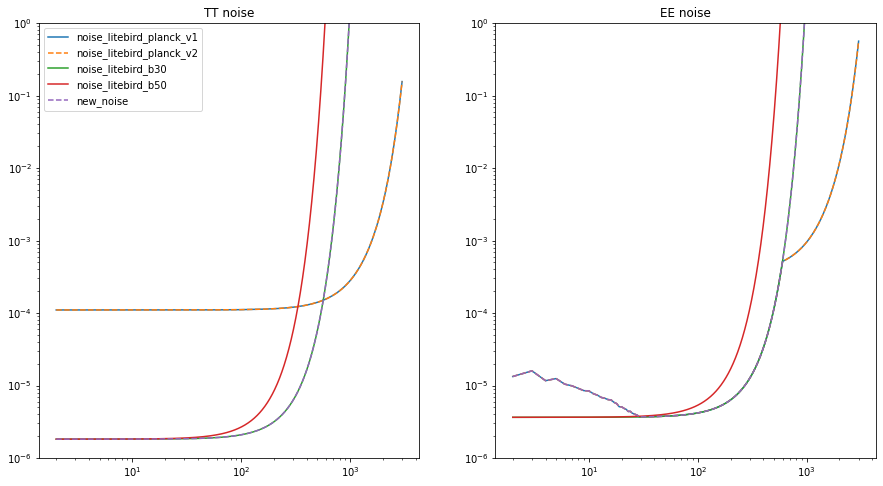

In [32]:
t1 = np.loadtxt("../../LB_forecast_Aachen/data/noise_litebird_planck_v1.dat")
t2 = np.loadtxt("../../LB_forecast_Aachen/data/noise_litebird_planck_v2.dat")
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.loglog(t1[:, 0], t1[:, 1], label="noise_litebird_planck_v1")
plt.loglog(t2[:, 0], t2[:, 1], label="noise_litebird_planck_v2", ls="--")
plt.subplot(1,2,2)
plt.loglog(t1[:, 0], t1[:, 2])
plt.loglog(t2[:, 0], t2[:, 2], ls="--")

'''
f = np.pi / 180. / 60
noise_in_muKarcmin = 6.56
theta_in_arcmin = 30.
ell = tbn30[:, 0]
N_ell_30 = (f * noise_in_muKarcmin)**2. * (
        np.exp(ell * (ell+1) * (f * theta_in_arcmin)**2. / 8. / np.log(2.))
) 
theta_in_arcmin = 50.
ell = tbn50[:, 0]
N_ell_50 = (f * noise_in_muKarcmin)**2. * (
        np.exp(ell * (ell+1) * (f * theta_in_arcmin)**2. / 8. / np.log(2.))
)
'''
f = t2.copy()
E_noise_in_muKarcmin = 6.56
arcmin_to_radian = np.pi / 180. / 60
ellss = np.arange(2, 1001)
theta_in_arcmin = 30.
N_TT_30 = (arcmin_to_radian * E_noise_in_muKarcmin / np.sqrt(2.))**2. * (
    np.exp(ellss * (ellss+1) * (arcmin_to_radian * theta_in_arcmin)**2. / 8. / np.log(2.)))
N_EE_30 = (arcmin_to_radian * E_noise_in_muKarcmin)**2. * (
    np.exp(ellss * (ellss+1) * (arcmin_to_radian * theta_in_arcmin)**2. / 8. / np.log(2.)))
N_EE_30[:27] = f[:27, 2]


#plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.title("TT noise")
plt.loglog(tbn30[:, 0], tbn30[:, 1], label="noise_litebird_b30")
#plt.loglog(tbn30[:, 0], N_ell_30, ls='--', label="my b30")
plt.loglog(tbn50[:, 0], tbn50[:, 1], label="noise_litebird_b50")
#plt.loglog(tbn50[:, 0], N_ell_50, ls='--', label="my b50")
plt.loglog(ells, N_TT_30, ls="--", label="new_noise")
plt.ylim(1e-6, 1)
plt.legend()
plt.subplot(1,2,2)
plt.title("EE noise")
plt.loglog(tbn30[:, 0], tbn30[:, 2])
#plt.loglog(tbn30[:, 0], N_ell_30, ls='--')
plt.loglog(tbn50[:, 0], tbn50[:, 2])
#plt.loglog(tbn50[:, 0], N_ell_50, ls='--')
plt.loglog(ells, N_EE_30, ls="--", label="new_noise")
plt.ylim(1e-6, 1)


<IPython.core.display.Javascript object>


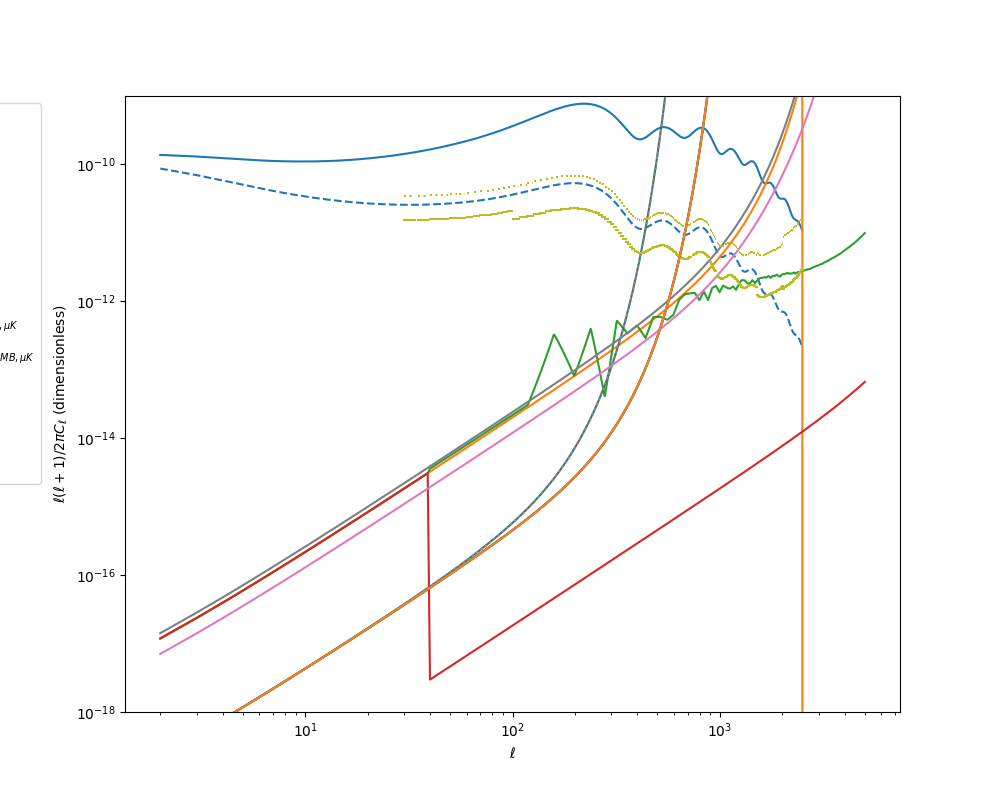

Text(0, 0.5, '$\\ell(\\ell+1)/2\\pi C_\\ell$ (dimensionless)')

In [49]:
# TT plot
xs = [
    ells,
    ells,
    lncmbx[0][2:],
    lncmbx[1][2:],
    lncmbx[2][2:],
    tbn30[:, 0],
    tbn50[:, 0],
    tbn30c[:, 0],
    nplk2[:, 0],
    nplk3[:, 0],
    tbn30b[:, 0],
    tbn50b[:, 0],
]
ys = [
    fact*cltt,
    fact*cltt*np.sqrt(2/(2*ells+1)),
    ncmbx[0]['T-T'][2:]*(lncmbx[0][2:]*(lncmbx[0][2:]+1))/2/np.pi,
    ncmbx[1]['T-T'][2:]*(lncmbx[1][2:]*(lncmbx[1][2:]+1))/2/np.pi,
    ncmbx[2]['T-T'][2:]*(lncmbx[2][2:]*(lncmbx[2][2:]+1))/2/np.pi,
    tbn30[:, 1]*tbn30[:, 0]*(tbn30[:, 0]+1)/2./np.pi/(2.7255*1e6)**2.,
    tbn50[:, 1]*tbn50[:, 0]*(tbn50[:, 0]+1)/2./np.pi/(2.7255*1e6)**2.,
    tbn30c[:, 1]*tbn30c[:, 0]*(tbn30c[:, 0]+1)/2./np.pi/(2.7255*1e6)**2.,
    nplk2[:, 1]*nplk2[:, 0]*(nplk2[:, 0]+1)/2./np.pi/(2.7255*1e6)**2.,
    nplk3[:, 1]*nplk3[:, 0]*(nplk3[:, 0]+1)/2./np.pi/(2.7255*1e6)**2.,
    tbn30b[:, 1]*tbn30b[:, 0]*(tbn30b[:, 0]+1)/2./np.pi/(2.7255*1e6)**2.,
    tbn50b[:, 1]*tbn50b[:, 0]*(tbn50b[:, 0]+1)/2./np.pi/(2.7255*1e6)**2.,
]
ls = [
    "-",
    "--",
    "-",
    "-",
    "-",
    "-",
    "-",
    "-",
    "-",
    "-",
    ":",
    ":",
]
labs = [
    r"Fiducial $C_\ell$",
    "Fiducial cosmic variance",
    "Euclid CMBX: Planck-like",
    "Euclid CMBX: SO",
    "Euclid CMBX: CMB-S4",   
    r"LB git: [LB b30]$\times \ell(\ell+1)/2\pi/T_{CMB,\mu K}^2$",
    r"LB git: [LB b50]$\times \ell(\ell+1)/2\pi/T_{CMB,\mu K}^2$",
    r"new LB git: [LB b30]$\times \ell(\ell+1)/2\pi/T_{CMB,\mu K}^2$",
    r"MontePy git: [fake_planck_real]$\times \ell(\ell+1)/2\pi/T_{CMB,\mu K}^2$",
    r"MontePy git: [fake_planck_real_2]$\times \ell(\ell+1)/2\pi/T_{CMB,\mu K}^2$",
    r"LB git: [LB b30]$\times \ell(\ell+1)/2\pi/T_{CMB,\mu K}^2$",
    r"LB git: [LB b50]$\times \ell(\ell+1)/2\pi/T_{CMB,\mu K}^2$",
]
cols = [
    "C0",
    "C0",
    "C1",
    "C2",
    "C3",
    "C4",
    "C5",
    "C4",
    "C6",
    "C7",
    "C9",
    "C9",
]
plt.figure(figsize=(10,8))
for x, y, l, lab, col in zip(xs, ys, ls, labs, cols):
    plt.loglog(x, y, ls=l, label=lab, color=col)
for i, (x, y1, y2) in enumerate(zip(plelltt, pltt, plttR)):
    lab = "Planck lite" if i == 0 else None
    plt.loglog(x, y1, label=lab, color="C8")
    lab = r"Planck lite $\sqrt{\Delta \ell}$ rescaled" if i == 0 else None
    plt.loglog(x, y2, label=lab, ls=':', color="C8")
plt.legend(prop={'family': 'monospace'}, bbox_to_anchor=(-0.1, 1))
plt.ylim(1e-18, 1e-09)
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell(\ell+1)/2\pi C_\ell$ (dimensionless)")


Text(0, 0.5, '$\\ell(\\ell+1)/2\\pi C_\\ell$ (dimensionless)')

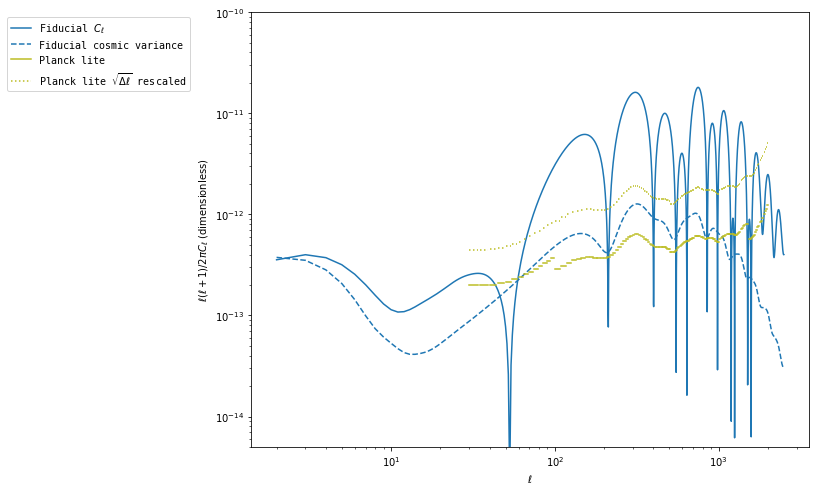

In [62]:
# TE plot
xs = [
    ells,
    ells,
]
ys = [
    fact*np.abs(clte),
    fact*np.sqrt((cltt*clee+clte**2.)/(2*ell+1)),
]
ls = [
    "-",
    "--",
]
labs = [
    r"Fiducial $C_\ell$",
    "Fiducial cosmic variance",
]
cols = [
    "C0",
    "C0",
]
plt.figure(figsize=(10,8))
for x, y, l, lab, col in zip(xs, ys, ls, labs, cols):
    plt.loglog(x, y, ls=l, label=lab, color=col)
for i, (x, y1, y2) in enumerate(zip(plellte, plte, plteR)):
    lab = "Planck lite" if i == 0 else None
    plt.loglog(x, y1, label=lab, color="C8")
    lab = r"Planck lite $\sqrt{\Delta \ell}$ rescaled" if i == 0 else None
    plt.loglog(x, y2, label=lab, ls=':', color="C8")
plt.legend(prop={'family': 'monospace'}, bbox_to_anchor=(-0.1, 1))
plt.ylim(5e-15, 1e-10)
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell(\ell+1)/2\pi C_\ell$ (dimensionless)")


Text(0, 0.5, '$\\ell(\\ell+1)/2\\pi C_\\ell$ (dimensionless)')

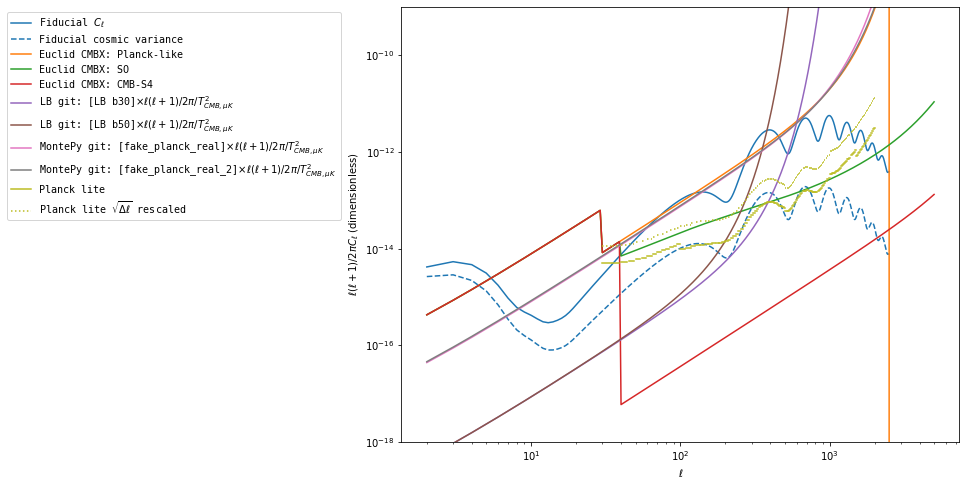

In [63]:
# EE plot
xs = [
    ells,
    ells,
    lncmbx[0][2:],
    lncmbx[1][2:],
    lncmbx[2][2:],
    tbn30[:, 0],
    tbn50[:, 0],
    nplk2[:, 0],
    nplk3[:, 0],
]
ys = [
    fact*clee,
    fact*clee*np.sqrt(2/(2*ell+1)),
    ncmbx[0]['E-E'][2:]*(lncmbx[0][2:]*(lncmbx[0][2:]+1))/2/np.pi,
    ncmbx[1]['E-E'][2:]*(lncmbx[1][2:]*(lncmbx[1][2:]+1))/2/np.pi,
    ncmbx[2]['E-E'][2:]*(lncmbx[2][2:]*(lncmbx[2][2:]+1))/2/np.pi,
    tbn30[:, 2]*tbn30[:, 0]*(tbn30[:, 0]+1)/2./np.pi/(2.7255*1e6)**2.,
    tbn50[:, 2]*tbn50[:, 0]*(tbn50[:, 0]+1)/2./np.pi/(2.7255*1e6)**2.,
    nplk2[:, 2]*nplk2[:, 0]*(nplk2[:, 0]+1)/2./np.pi/(2.7255*1e6)**2.,
    nplk3[:, 2]*nplk3[:, 0]*(nplk3[:, 0]+1)/2./np.pi/(2.7255*1e6)**2.,
]
ls = [
    "-",
    "--",
    "-",
    "-",
    "-",
    "-",
    "-",
    "-",
    "-",
]
labs = [
    r"Fiducial $C_\ell$",
    "Fiducial cosmic variance",
    "Euclid CMBX: Planck-like",
    "Euclid CMBX: SO",
    "Euclid CMBX: CMB-S4",   
    r"LB git: [LB b30]$\times \ell(\ell+1)/2\pi/T_{CMB,\mu K}^2$",
    r"LB git: [LB b50]$\times \ell(\ell+1)/2\pi/T_{CMB,\mu K}^2$",
    r"MontePy git: [fake_planck_real]$\times \ell(\ell+1)/2\pi/T_{CMB,\mu K}^2$",
    r"MontePy git: [fake_planck_real_2]$\times \ell(\ell+1)/2\pi/T_{CMB,\mu K}^2$",
]
cols = [
    "C0",
    "C0",
    "C1",
    "C2",
    "C3",
    "C4",
    "C5",
    "C6",
    "C7",
]
plt.figure(figsize=(10,8))
for x, y, l, lab, col in zip(xs, ys, ls, labs, cols):
    plt.loglog(x, y, ls=l, label=lab, color=col)
for i, (x, y1, y2) in enumerate(zip(plellee, plee, pleeR)):
    lab = "Planck lite" if i == 0 else None
    plt.loglog(x, y1, label=lab, color="C8")
    lab = r"Planck lite $\sqrt{\Delta \ell}$ rescaled" if i == 0 else None
    plt.loglog(x, y2, label=lab, ls=':', color="C8")
plt.legend(prop={'family': 'monospace'}, bbox_to_anchor=(-0.1, 1))
plt.ylim(1e-18, 1e-09)
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell(\ell+1)/2\pi C_\ell$ (dimensionless)")


/usr/lib/python3/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


Text(0, 0.5, '$(\\ell(\\ell+1))^2/2\\pi C_\\ell$ (dimensionless)')

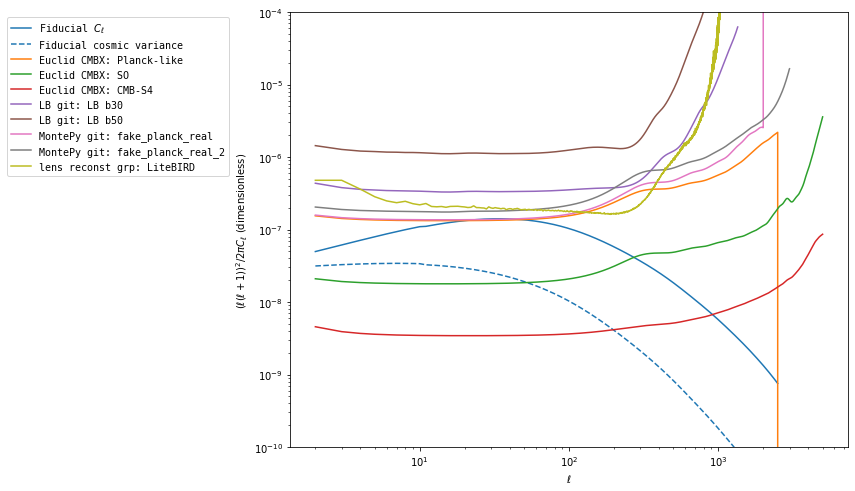

In [69]:
# phiphi plot
xs = [
    ells,
    ells,
    lncmbx[0][2:],
    lncmbx[1][2:],
    lncmbx[2][2:],
    tbn30[:, 0],
    tbn50[:, 0],
    nplk2[:, 0],
    nplk3[:, 0],
    L,
]
ys = [
    factp*clpp,
    factp*clpp*np.sqrt(2/(2*ell+1)),
    ncmbx[0]['phi-phi'][2:]*(lncmbx[0][2:]*(lncmbx[0][2:]+1))**2./2/np.pi,
    ncmbx[1]['phi-phi'][2:]*(lncmbx[1][2:]*(lncmbx[1][2:]+1))**2./2/np.pi,
    ncmbx[2]['phi-phi'][2:]*(lncmbx[2][2:]*(lncmbx[2][2:]+1))**2./2/np.pi,
    tbn30[:, 3],
    tbn50[:, 3],
    nplk2[:, 3],
    nplk3[:, 3],
    (L*(L+1))**2*N0/R0**2/2/np.pi,
]
ls = [
    "-",
    "--",
    "-",
    "-",
    "-",
    "-",
    "-",
    "-",
    "-",
    "-",
]
labs = [
    r"Fiducial $C_\ell$",
    "Fiducial cosmic variance",
    "Euclid CMBX: Planck-like",
    "Euclid CMBX: SO",
    "Euclid CMBX: CMB-S4",   
    "LB git: LB b30",
    "LB git: LB b50",
    "MontePy git: fake_planck_real",
    "MontePy git: fake_planck_real_2",
    "lens reconst grp: LiteBIRD",
]
cols = [
    "C0",
    "C0",
    "C1",
    "C2",
    "C3",
    "C4",
    "C5",
    "C6",
    "C7",
    "C8",
]
plt.figure(figsize=(10,8))
for x, y, l, lab, col in zip(xs, ys, ls, labs, cols):
    plt.loglog(x, y, ls=l, label=lab, color=col)
plt.legend(prop={'family': 'monospace'}, bbox_to_anchor=(-0.1, 1))
plt.ylim(1e-10, 1e-04)
plt.xlabel(r"$\ell$")
plt.ylabel(r"$(\ell(\ell+1))^2/2\pi C_\ell$ (dimensionless)")


# Choice of $\ell_{\rm cut}$

<IPython.core.display.Javascript object>


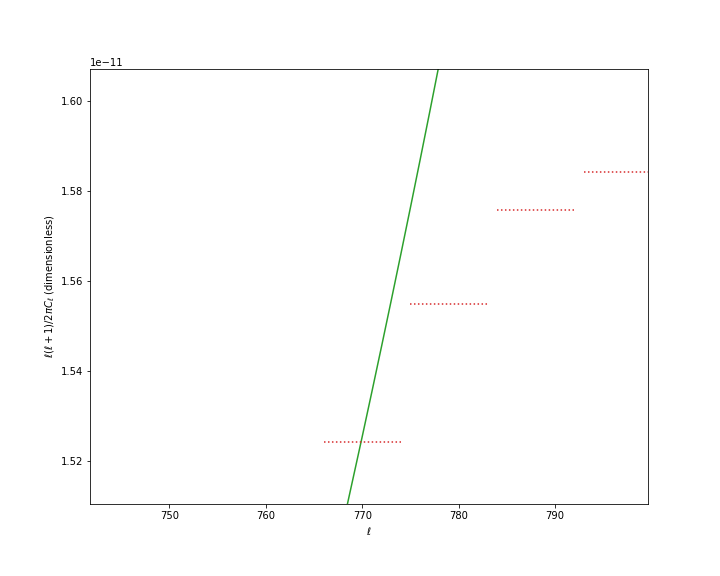

In [3]:
%matplotlib notebook

# TT plot
lb_fsky = 0.90
xs = [
    ells,
    ells,
    tbn20c[:, 0],
    tbn30c[:, 0],
]
ys = [
    fact*cltt,
    fact*cltt*np.sqrt(2/(2*ells+1)),
    (tbn20c[:, 1]/(2.7255*1e6)**2.+cltt[:len(tbn20c)])*np.sqrt(2/(2*tbn20c[:, 0]+1)/lb_fsky)*tbn20c[:, 0]*(tbn20c[:, 0]+1)/2./np.pi,
    (tbn30c[:, 1]/(2.7255*1e6)**2.+cltt[:len(tbn30c)])*np.sqrt(2/(2*tbn30c[:, 0]+1)/lb_fsky)*tbn30c[:, 0]*(tbn30c[:, 0]+1)/2./np.pi,
]
ystt = ys.copy()
ls = [
    "-",
    "--",
    "-",
    "-",
    "-",
    "-",
    "-",
    "-",
    "-",
]
labs = [
    r"Fiducial $C_\ell$",
    "Fiducial cosmic variance",
    r"LiteBIRD 30 arcmin, fsky=%s" % lb_fsky,
    r"LiteBIRD 50 arcmin, fsky=%s" % lb_fsky,
]
cols = [
    "C0",
    "C0",
    "C1",
    "C2",
]
#plt.figure(figsize=(15,8),dpi=200)
plt.figure(figsize=(10,8))
'''
plt.subplot(1,2,1)
for x, y, l, lab, col in zip(xs, ys, ls, labs, cols):
    plt.loglog(x, y, ls=l, label=lab, color=col)
for i, (x, y1, y2) in enumerate(zip(plelltt, pltt, plttR)):
    lab = "Planck lite" if i == 0 else None
    plt.loglog(x, y1, label=lab, color="C3")
    lab = r"Planck lite $\sqrt{\Delta \ell}$ rescaled" if i == 0 else None
    plt.loglog(x, y2, label=lab, ls=':', color="C3")
plt.legend(prop={'family': 'monospace'})#, bbox_to_anchor=(-0.1, 1))
plt.ylim(1e-13, 1e-09)
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell(\ell+1)/2\pi C_\ell$ (dimensionless)")
plt.subplot(1,2,2)
'''
for x, y, l, lab, col in zip(xs, ys, ls, labs, cols):
    plt.loglog(x, y, ls=l, label=lab, color=col)
for i, (x, y1, y2) in enumerate(zip(plelltt, pltt, plttR)):
    lab = "Planck lite" if i == 0 else None
    plt.loglog(x, y1, label=lab, color="C3")
    lab = r"Planck lite $\sqrt{\Delta \ell}$ rescaled" if i == 0 else None
    plt.loglog(x, y2, label=lab, ls=':', color="C3")
plt.xlim(300., 2000)
plt.ylim(1e-11, 3e-11)
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell(\ell+1)/2\pi C_\ell$ (dimensionless)")
plt.xscale("linear")
plt.yscale("linear")

<IPython.core.display.Javascript object>


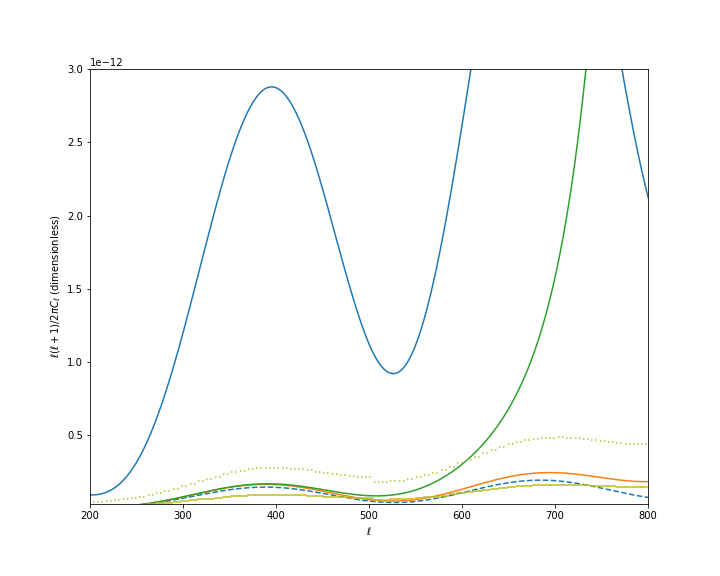

In [6]:
# EE plot
lb_fsky = 0.80
xs = [
    ells,
    ells,
    tbn20c[:, 0],
    tbn30c[:, 0],
]
ys = [
    fact*clee,
    fact*clee*np.sqrt(2/(2*ells+1)),
    (tbn20c[:, 2]/(2.7255*1e6)**2.+clee[:len(tbn20c)])*np.sqrt(2/(2*tbn20c[:, 0]+1)/lb_fsky)*tbn20c[:, 0]*(tbn20c[:, 0]+1)/2./np.pi,
    (tbn30c[:, 2]/(2.7255*1e6)**2.+clee[:len(tbn30c)])*np.sqrt(2/(2*tbn30c[:, 0]+1)/lb_fsky)*tbn30c[:, 0]*(tbn30c[:, 0]+1)/2./np.pi,
]
ysee = ys.copy()
ls = [
    "-",
    "--",
    "-",
    "-",
    "-",
    "-",
    "-",
    "-",
    "-",
]
labs = [
    r"Fiducial $C_\ell$",
    "Fiducial cosmic variance",
    r"LiteBIRD 30 arcmin, fsky=%s" % lb_fsky,
    r"LiteBIRD 50 arcmin, fsky=%s" % lb_fsky,
]
cols = [
    "C0",
    "C0",
    "C1",
    "C2",
]
#plt.figure(figsize=(15,8),dpi=200)
plt.figure(figsize=(10,8))
'''
plt.subplot(1,2,1)
for x, y, l, lab, col in zip(xs, ys, ls, labs, cols):
    plt.loglog(x, y, ls=l, label=lab, color=col)
for i, (x, y1, y2) in enumerate(zip(plellee, plee, pleeR)):
    lab = "Planck lite" if i == 0 else None
    plt.loglog(x, y1, label=lab, color="C8")
    lab = r"Planck lite $\sqrt{\Delta \ell}$ rescaled" if i == 0 else None
    plt.loglog(x, y2, label=lab, ls=':', color="C8")
plt.legend(prop={'family': 'monospace'})#, bbox_to_anchor=(-0.1, 1))
plt.ylim(1e-17, 1e-10)
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell(\ell+1)/2\pi C_\ell$ (dimensionless)")
plt.subplot(1,2,2)
'''
for x, y, l, lab, col in zip(xs, ys, ls, labs, cols):
    plt.loglog(x, y, ls=l, label=lab, color=col)
for i, (x, y1, y2) in enumerate(zip(plellee, plee, pleeR)):
    lab = "Planck lite" if i == 0 else None
    plt.loglog(x, y1, label=lab, color="C8")
    lab = r"Planck lite $\sqrt{\Delta \ell}$ rescaled" if i == 0 else None
    plt.loglog(x, y2, label=lab, ls=':', color="C8")
plt.xlim(200., 800)
plt.ylim(3e-14, 3e-12)
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell(\ell+1)/2\pi C_\ell$ (dimensionless)")
plt.xscale("linear")
plt.yscale("linear")

<IPython.core.display.Javascript object>


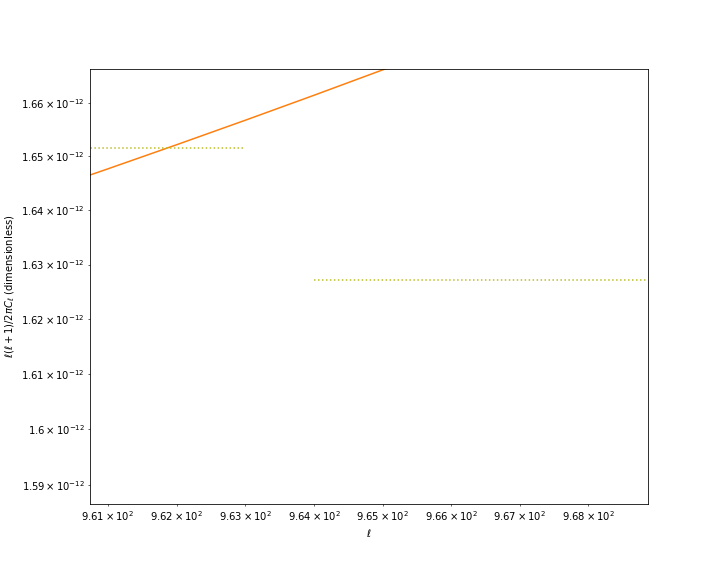

Text(0, 0.5, '$\\ell(\\ell+1)/2\\pi C_\\ell$ (dimensionless)')

In [8]:
# TE plot
lb_fsky = 0.90
xs = [
    ells,
    ells,
    tbn20c[:, 0],
    tbn30c[:, 0],
]
ys = [
    fact*np.abs(clte),
    fact*np.sqrt((clte**2.+cltt*clee)/(2*ells+1)),
    np.sqrt(((tbn20c[:, 1]/(2.7255*1e6)**2.+cltt[:len(tbn20c)])*(tbn20c[:, 2]/(2.7255*1e6)**2.+clee[:len(tbn20c)])+clte[:len(tbn20c)]**2.)/(2*tbn20c[:, 0]+1)/lb_fsky)*tbn20c[:, 0]*(tbn20c[:, 0]+1)/2./np.pi,
    np.sqrt(((tbn30c[:, 1]/(2.7255*1e6)**2.+cltt[:len(tbn30c)])*(tbn30c[:, 2]/(2.7255*1e6)**2.+clee[:len(tbn30c)])+clte[:len(tbn30c)]**2.)/(2*tbn30c[:, 0]+1)/lb_fsky)*tbn30c[:, 0]*(tbn30c[:, 0]+1)/2./np.pi,
]
yste = ys.copy()
ls = [
    "-",
    "--",
    "-",
    "-",
    "-",
    "-",
    "-",
    "-",
    "-",
]
labs = [
    r"Fiducial $C_\ell$",
    "Fiducial cosmic variance",
    r"LiteBIRD 20 arcmin, fsky=%s" % lb_fsky,
    r"LiteBIRD 30 arcmin, fsky=%s" % lb_fsky,
]
cols = [
    "C0",
    "C0",
    "C1",
    "C2",
]
#plt.figure(figsize=(15,8),dpi=200)
plt.figure(figsize=(10,8))
'''
plt.subplot(1,2,1)
for x, y, l, lab, col in zip(xs, ys, ls, labs, cols):
    plt.loglog(x, y, ls=l, label=lab, color=col)
for i, (x, y1, y2) in enumerate(zip(plellee, plee, pleeR)):
    lab = "Planck lite" if i == 0 else None
    plt.loglog(x, y1, label=lab, color="C8")
    lab = r"Planck lite $\sqrt{\Delta \ell}$ rescaled" if i == 0 else None
    plt.loglog(x, y2, label=lab, ls=':', color="C8")
plt.legend(prop={'family': 'monospace'})#, bbox_to_anchor=(-0.1, 1))
plt.ylim(1e-17, 1e-10)
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell(\ell+1)/2\pi C_\ell$ (dimensionless)")
plt.subplot(1,2,2)
'''
for x, y, l, lab, col in zip(xs, ys, ls, labs, cols):
    plt.loglog(x, y, ls=l, label=lab, color=col)
for i, (x, y1, y2) in enumerate(zip(plellte, plte, plteR)):
    lab = "Planck lite" if i == 0 else None
    plt.loglog(x, y1, label=lab, color="C8")
    lab = r"Planck lite $\sqrt{\Delta \ell}$ rescaled" if i == 0 else None
    plt.loglog(x, y2, label=lab, ls=':', color="C8")
#plt.xlim(200., 800)
plt.ylim(1e-15, 3e-11)
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell(\ell+1)/2\pi C_\ell$ (dimensionless)")

In [8]:
#SNR study
print(ells)
print(tbn30[:, 0])
print(tbn50[:, 0])
#
'''
perfect_SNR2 = []
for i in range(len(ells)):
    S = np.array([ctt[i], cee[i], cte[i]])
    N = np.array([
        [,,],
        [,,],
        [,,],
    ])
'''
list(zip(plellee, plee, pleeR))[:3]

[2.000e+00 3.000e+00 4.000e+00 ... 2.498e+03 2.499e+03 2.500e+03]
[   2.    3.    4. ... 1348. 1349. 1350.]
[   2.    3.    4. ... 1348. 1349. 1350.]


[([30, 31, 32, 33, 34],
  [5.12832823634718e-15,
   5.12832823634718e-15,
   5.12832823634718e-15,
   5.12832823634718e-15,
   5.12832823634718e-15],
  [1.14672905474039e-14,
   1.14672905474039e-14,
   1.14672905474039e-14,
   1.14672905474039e-14,
   1.14672905474039e-14]),
 ([35, 36, 37, 38, 39],
  [5.151219446344058e-15,
   5.151219446344058e-15,
   5.151219446344058e-15,
   5.151219446344058e-15,
   5.151219446344058e-15],
  [1.1518476849044147e-14,
   1.1518476849044147e-14,
   1.1518476849044147e-14,
   1.1518476849044147e-14,
   1.1518476849044147e-14]),
 ([40, 41, 42, 43, 44],
  [5.319497134069196e-15,
   5.319497134069196e-15,
   5.319497134069196e-15,
   5.319497134069196e-15,
   5.319497134069196e-15],
  [1.1894757197894035e-14,
   1.1894757197894035e-14,
   1.1894757197894035e-14,
   1.1894757197894035e-14,
   1.1894757197894035e-14])]

***

# Comparison of MCMC results with various $N_\ell$ prescriptions versus true Planck

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from getdist.plots import getPlotter
from getdist.mcsamples import loadMCSamples

In [5]:
fnames_1 = [
    "chains/2023_02_01_P18-298-2508_LCDM",
    "chains/2023_02_02_fakeP18-298-2508_LCDM",
    "chains/2023_02_03_fakeP18-298-2508-noise1_LCDM",
    "chains/2023_02_08_fakeP18-298-2508-noise2_LCDM",
    "chains/2023_02_09_fakeP18-298-2508-PlanckLiteNoise_LCDM",
    "chains/2023_02_22_P18-298-2508_nuLCDM_zeus",
    "chains/2023_02_22_P18+lens-298-2508_nuLCDM_zeus",
    "chains/2023_03_07_fakeP18-298-2508-PlanckLiteNoise_LCDM_zeus",
]
fnames_2 = [
    "chains/2023_02_01_P18-496-2508_LCDM",
    "chains/2023_02_02_fakeP18-496-2508_LCDM",
    "chains/2023_02_03_fakeP18-496-2508-noise1_LCDM",
    "chains/2023_02_08_fakeP18-496-2508-noise2_LCDM",
    "chains/2023_02_09_fakeP18-496-2508-PlanckLiteNoise_LCDM",
    "chains/2023_02_22_P18-496-2508_nuLCDM_zeus",
    "chains/2023_02_22_P18+lens-496-2508_nuLCDM_zeus",
    "chains/2023_02_22_fakeP18-496-2508-PlanckLiteNoise_nuLCDM_zeus",
]

labels_1 = [
    'real Planck ell=[298-2508]',
    'fake Planck with CMBX noise',
    'fake Planck with Lewis noise',
    'fake Planck with Thejs noise',
    'fake Planck with Planck Lite noise',
    'real Planck ell=[298-2508]',
    'real Planck ell=[298-2508] + lensing',
    'fake Planck with Planck Lite noise',
]
labels_2 = [
    'real Planck ell=[496-2508]',
    'fake Planck with CMBX noise',
    'fake Planck with Lewis noise',
    'fake Planck with Thejs noise',
    'fake Planck with Planck Lite noise',
    'real Planck ell=[496-2508]',
    'real Planck ell=[496-2508] + lensing',
    'fake Planck with Planck Lite noise',
]

In [6]:
MCs_1 = []
MCs_2 = []
for fname in fnames_1:
    MCs_1.append(loadMCSamples(f"./{fname}_gdist"))
for fname in fnames_2:
    MCs_2.append(loadMCSamples(f"./{fname}_gdist"))

## LCDM, $\ell=[298, 2508]$, raw chains

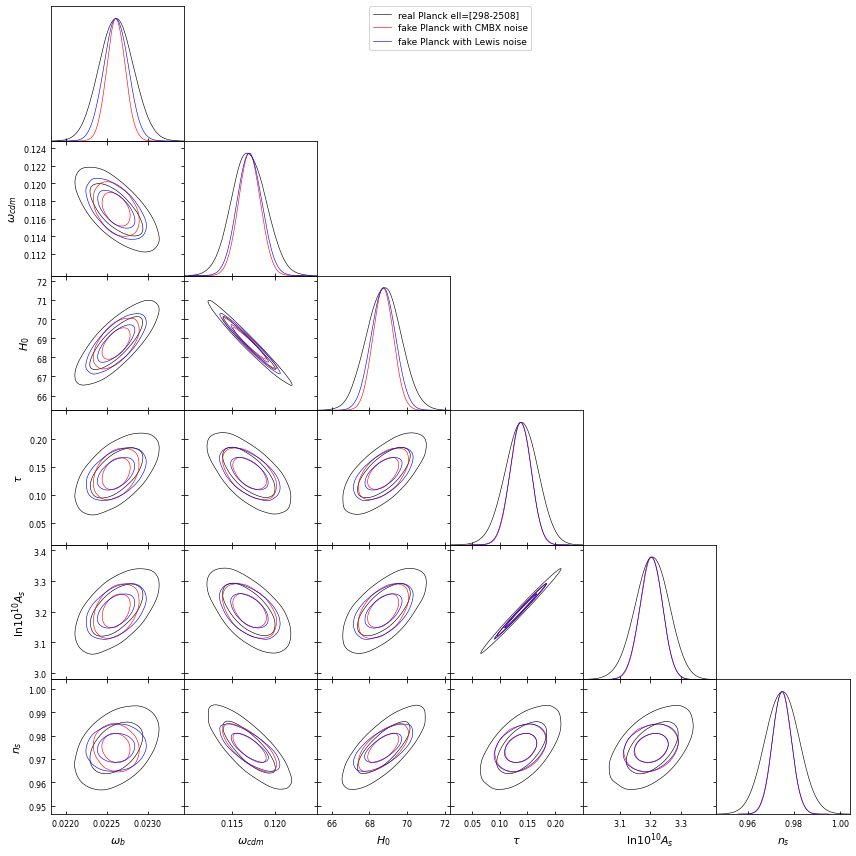

In [7]:
g = getPlotter()
g.triangle_plot(
    MCs_1[:3],
    ["omega_b","omega_cdm","H0","tau_reio","ln10^{10}A_s","n_s"],
    legend_labels=labels_1[:3],
)

## LCDM, $\ell=[496, 2508]$, raw chains

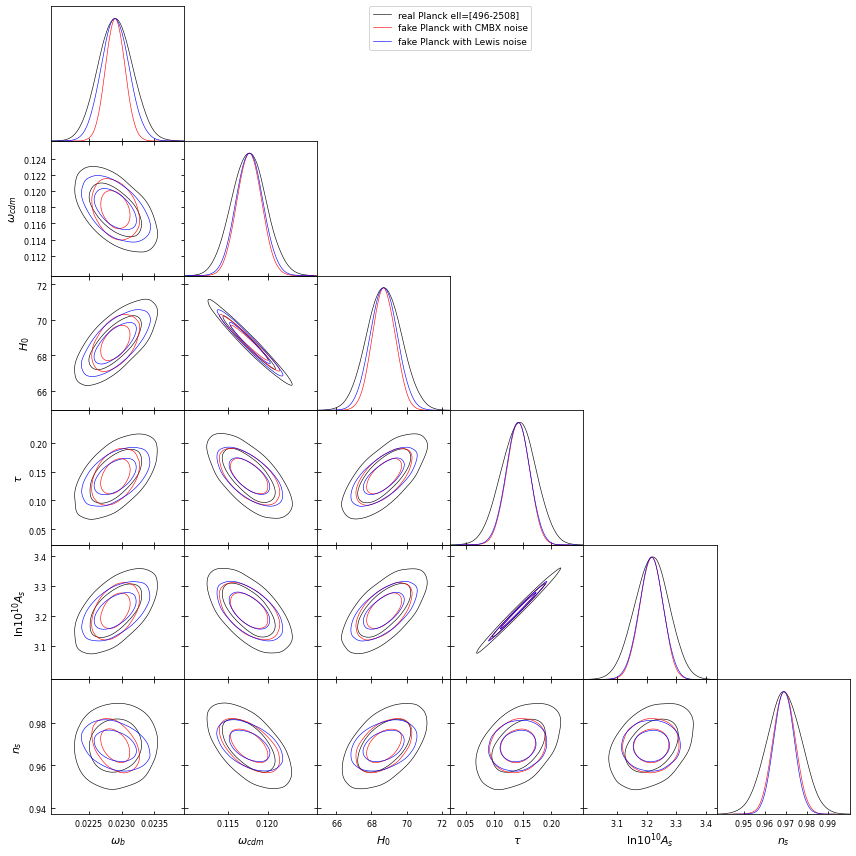

In [8]:
g = getPlotter()
g.triangle_plot(
    MCs_2[:3],
    ["omega_b","omega_cdm","H0","tau_reio","ln10^{10}A_s","n_s"],
    legend_labels=labels_2[:3],
)

In [9]:
# Rescale the samples according to the std dev of the "real" Planck chain
std_ref = MCs_1[0].samples.std(axis=0)[:6]
ratios_1 = []
for i in range(3):
    std = MCs_1[i+1].samples.std(axis=0)[:6]
    ratio = np.mean(std_ref / std)
    ratios_1.append(ratio)
    me = MCs_1[i+1].samples.mean(axis=0)[:6]
    MCs_1[i+1].samples[:, :6] = MCs_1[i+1].samples[:, :6] * ratio + (1 - ratio) * me
std_ref = MCs_2[0].samples.std(axis=0)[:6]
ratios_2 = []
for i in range(3):
    std = MCs_2[i+1].samples.std(axis=0)[:6]
    ratio = np.mean(std_ref / std)
    ratios_2.append(ratio)
    me = MCs_2[i+1].samples.mean(axis=0)[:6]
    MCs_2[i+1].samples[:, :6] = MCs_2[i+1].samples[:, :6] * ratio + (1 - ratio) * me

## LCDM, $\ell=[298, 2508]$, chains rescaled to Planck

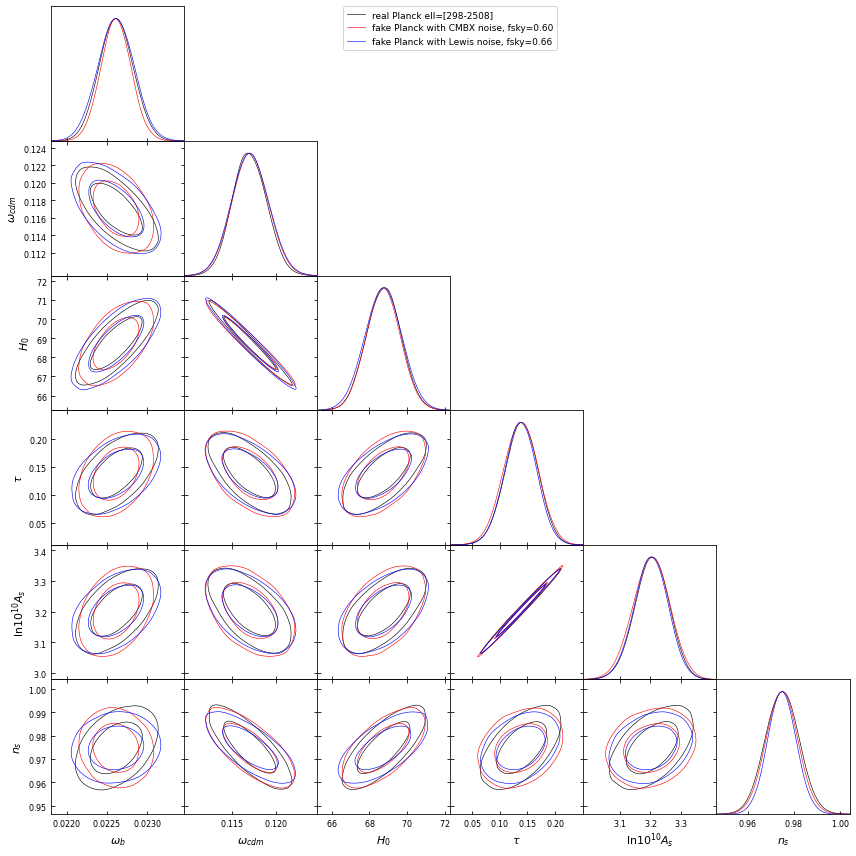

In [10]:
g = getPlotter()
labels_1b = [labels_1[0]] + [labels_1[i]+", fsky=%.2f"%(1/ratios_1[i-1]) for i in range(1,4)]
g.triangle_plot(
    MCs_1[:3],
    ["omega_b","omega_cdm","H0","tau_reio","ln10^{10}A_s","n_s"],
    legend_labels=labels_1b[:-1],
)

## LCDM, $\ell=[496, 2508]$, chains rescaled to Planck

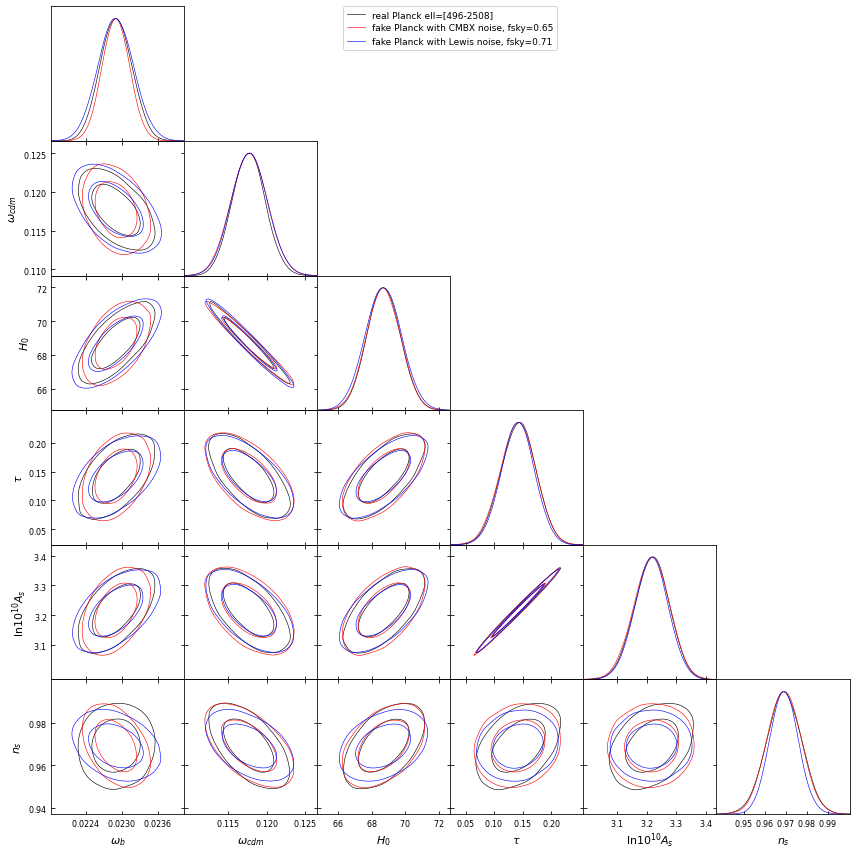

In [11]:
g = getPlotter()
labels_2b = [labels_2[0]] + [labels_2[i]+", fsky=%.2f"%(1/ratios_2[i-1]) for i in range(1,4)]
g.triangle_plot(
    MCs_2[:3],
    ["omega_b","omega_cdm","H0","tau_reio","ln10^{10}A_s","n_s"],
    legend_labels=labels_2b[:-1],
)

## LCDM, $\ell=[298, 2508]$, Planck lite test

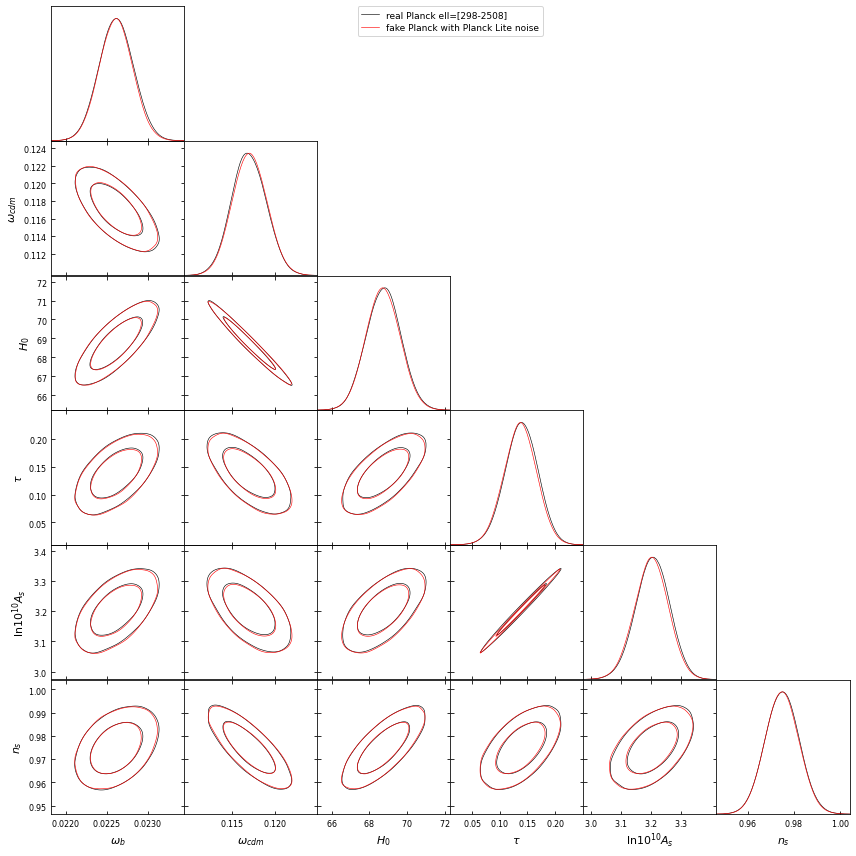

In [12]:
g = getPlotter()
g.triangle_plot(
    [MCs_1[0], MCs_1[4]],
    ["omega_b","omega_cdm","H0","tau_reio","ln10^{10}A_s","n_s"],
    legend_labels=[labels_1[0], labels_1[4]]
)

## LCDM, $\ell=[496, 2508]$, Planck lite test

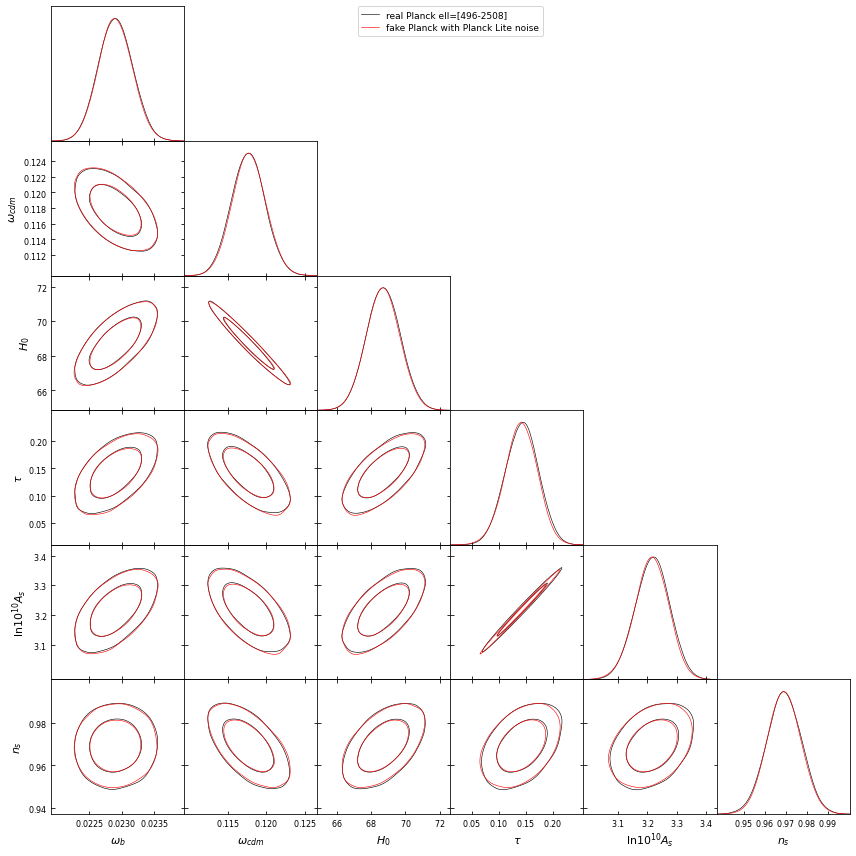

In [13]:
g = getPlotter()
g.triangle_plot(
    [MCs_2[0], MCs_2[4]],
    ["omega_b","omega_cdm","H0","tau_reio","ln10^{10}A_s","n_s"],
    legend_labels=[labels_2[0], labels_2[4]]
)

## $\nu$LCDM, $\ell=[298, 2508]$, Planck lite test

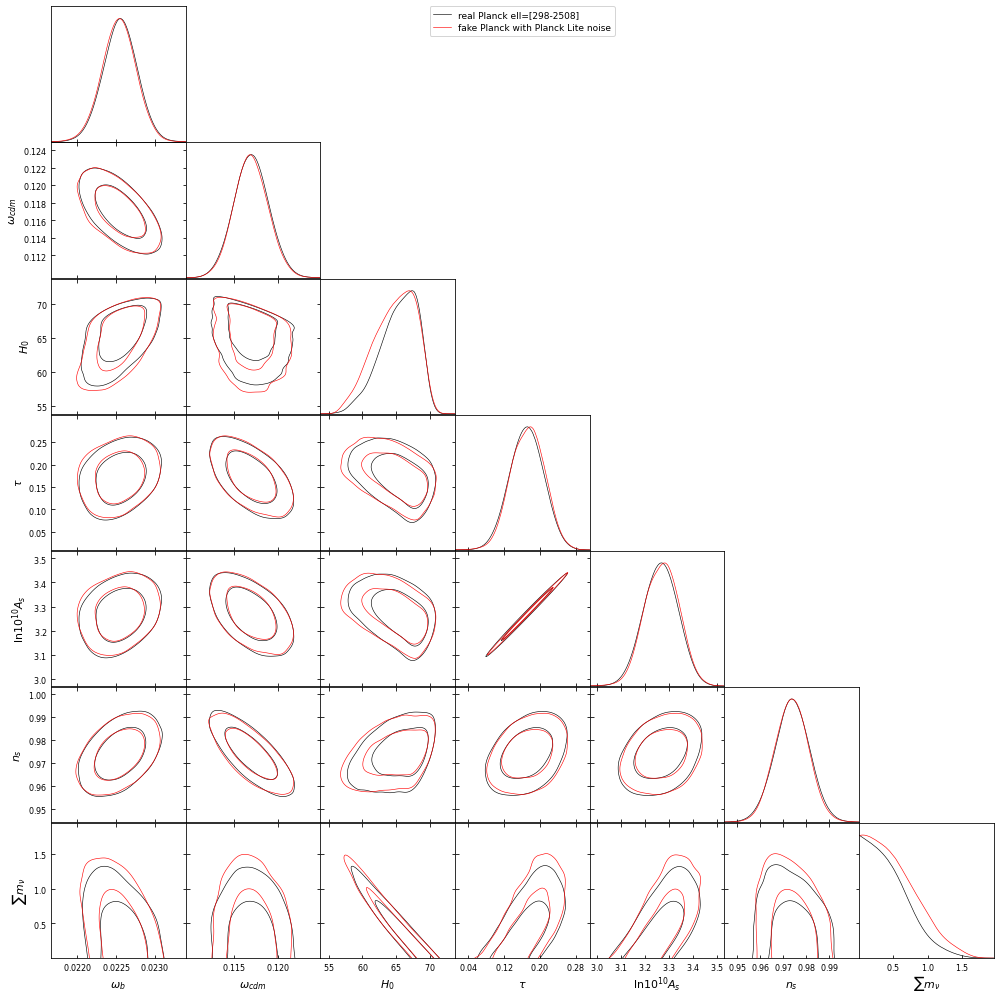

In [14]:
g = getPlotter()
g.triangle_plot(
    [MCs_1[5], MCs_1[7]],
    ["omega_b","omega_cdm","H0","tau_reio","ln10^{10}A_s","n_s","sum_mnu"],
    legend_labels=[labels_1[5], labels_1[7]]
)

## $\nu$LCDM, $\ell=[496, 2508]$, Planck lite test

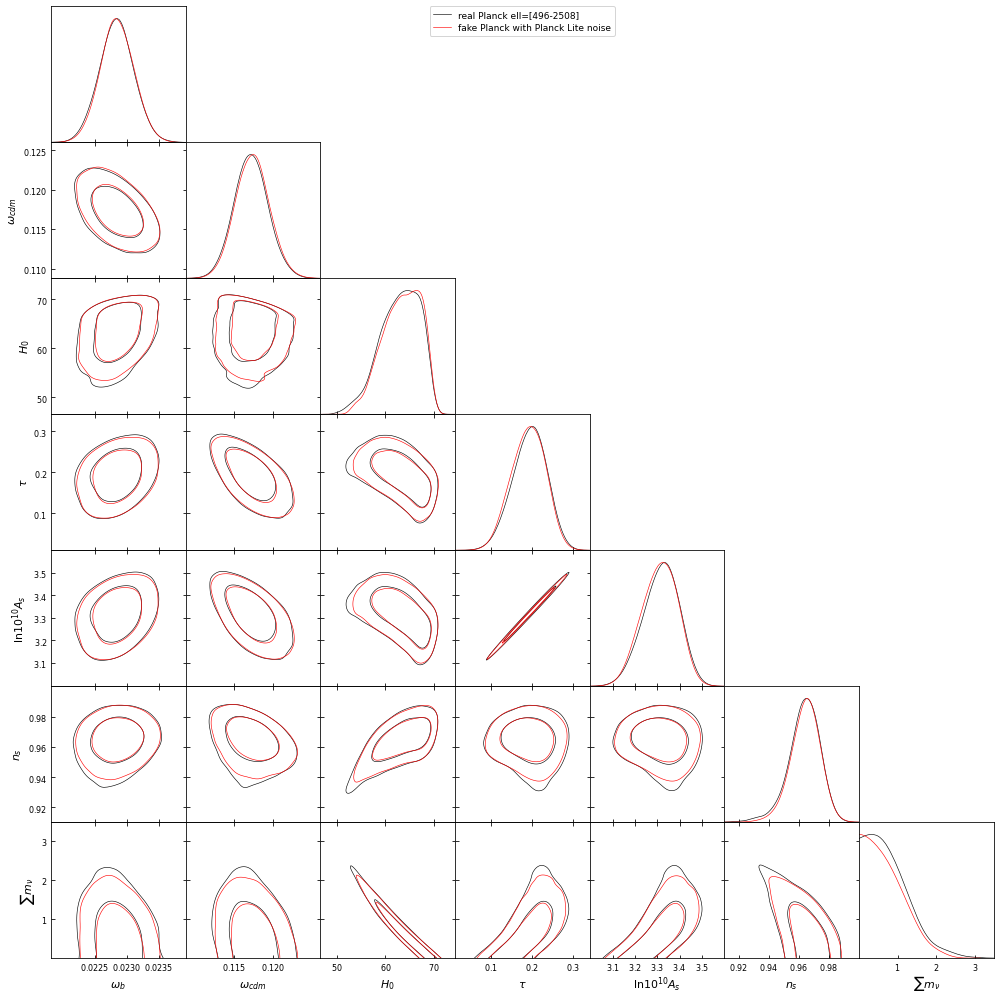

In [15]:
g = getPlotter()
g.triangle_plot(
    [MCs_2[5], MCs_2[7]],
    ["omega_b","omega_cdm","H0","tau_reio","ln10^{10}A_s","n_s","sum_mnu"],
    legend_labels=[labels_2[5], labels_2[7]]
)

## $\nu$LCDM, $\ell=[298, 2508]$ + lensing, Planck lite test

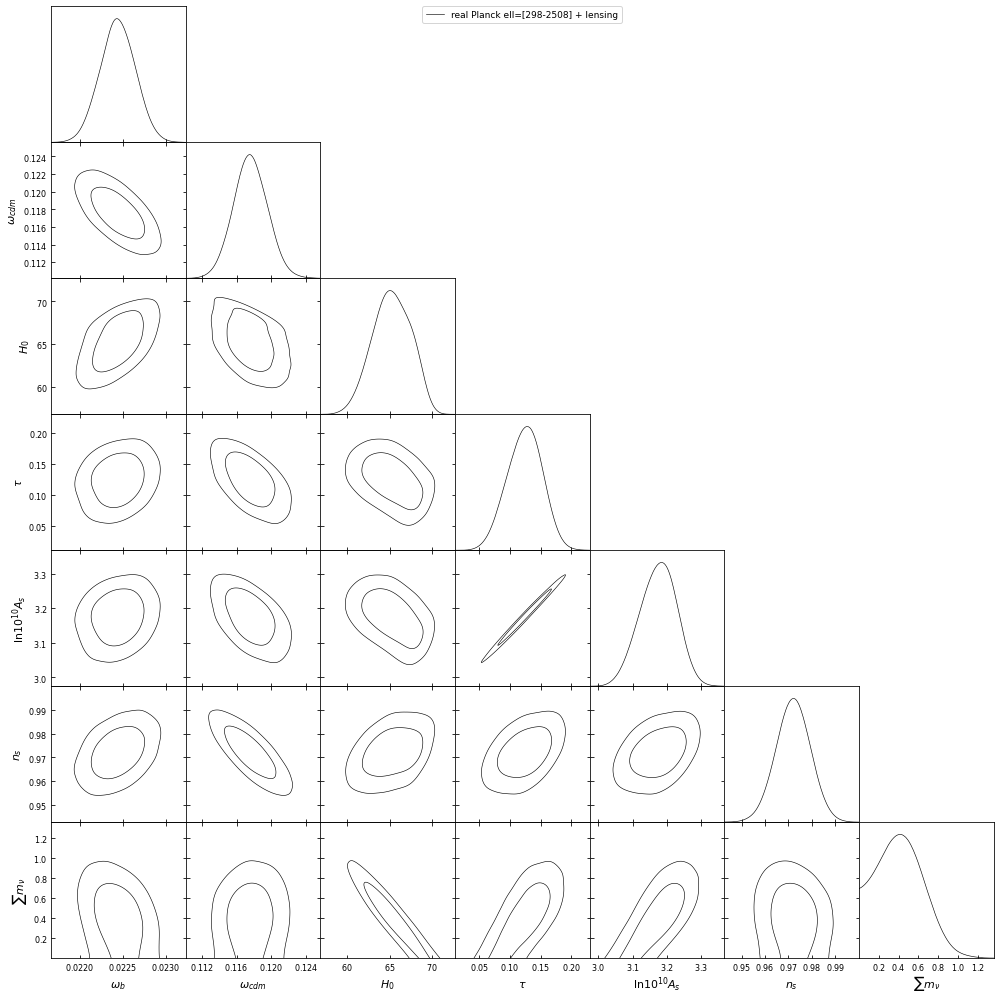

In [17]:
g = getPlotter()
g.triangle_plot(
    [MCs_1[6]],
    ["omega_b","omega_cdm","H0","tau_reio","ln10^{10}A_s","n_s","sum_mnu"],
    legend_labels=[labels_1[6]]
)

## $\nu$LCDM, $\ell=[496, 2508]$ + lensing, Planck lite test

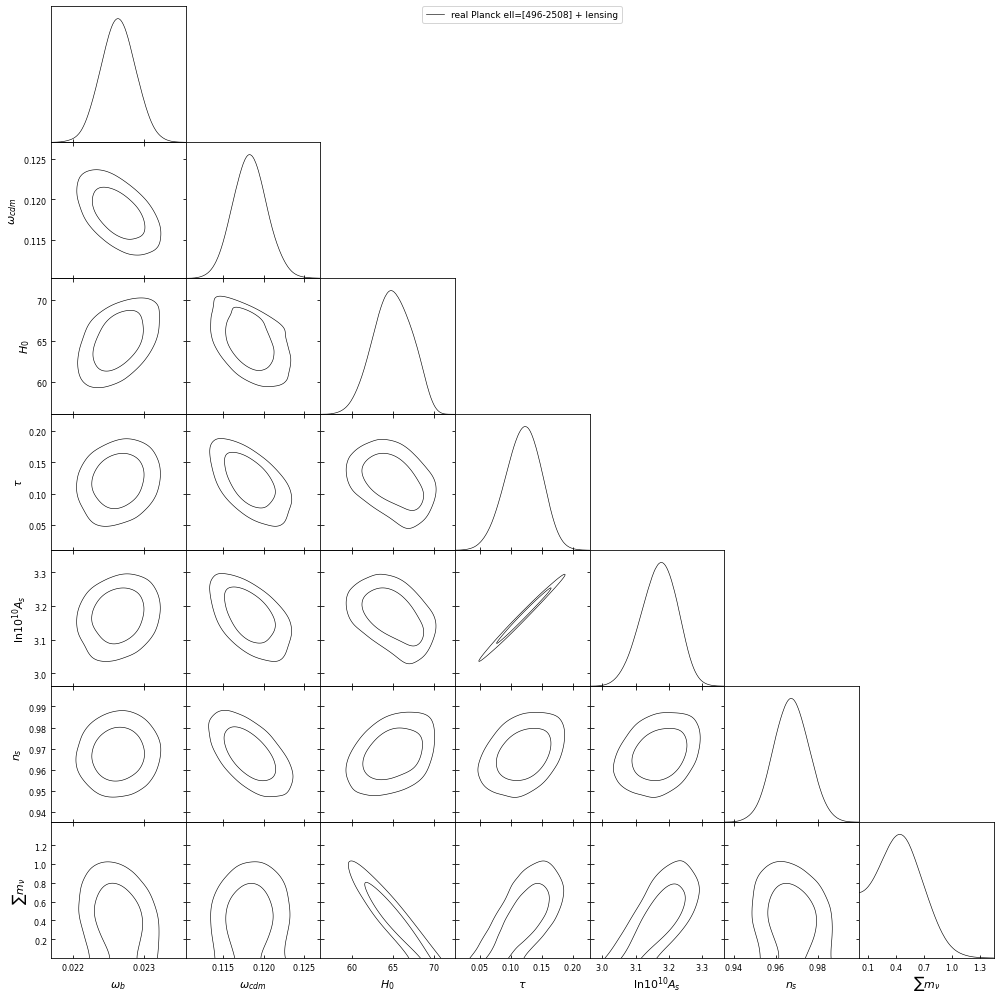

In [18]:
g = getPlotter()
g.triangle_plot(
    [MCs_2[6]],
    ["omega_b","omega_cdm","H0","tau_reio","ln10^{10}A_s","n_s","sum_mnu"],
    legend_labels=[labels_2[6]]
)